<a href="https://colab.research.google.com/github/helmaft/weather-pr/blob/main/weather_predection_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/programing/seattle-weather.csv')

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
df.isna().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
df.dtypes

date              object
precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
weather           object
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f523a21ae50>,
      dtype=object)

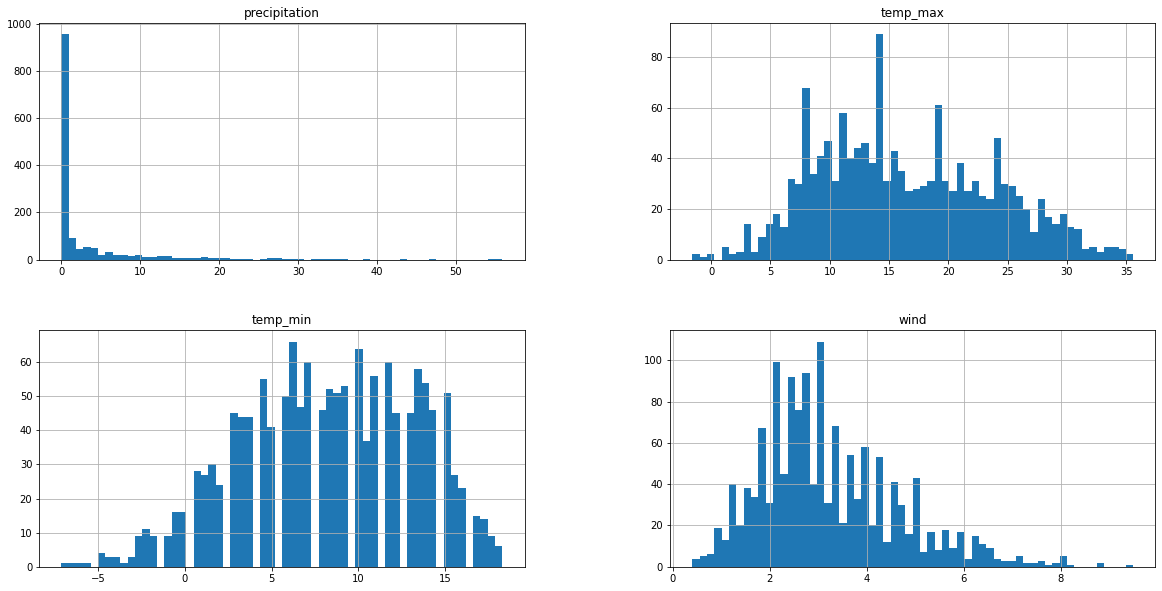

In [ ]:
df.hist(bins=60, figsize=(20,10))

In [ ]:
df['temp_max'].value_counts()

 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: temp_max, Length: 67, dtype: int64

In [ ]:
df['temp_min'].value_counts()

 6.1     66
 10.0    64
 11.7    60
 7.2     60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0    51
 8.9     51
 5.6     50
 6.7     47
 14.4    46
 7.8     46
 12.2    45
 2.8     45
 12.8    45
 3.3     44
 3.9     44
 5.0     41
 10.6    37
 1.7     30
 0.6     28
 1.1     27
 15.6    27
 2.2     24
 16.1    23
 0.0     16
 16.7    15
 17.2    14
 17.8     9
-0.5      9
-2.1      8
-0.6      7
-1.1      7
-2.8      7
-1.7      6
 18.3     6
-4.9      4
-1.6      3
-3.2      3
-2.2      3
-1.0      2
-2.7      2
-4.3      2
-3.9      2
-6.6      1
-7.1      1
-5.5      1
-6.0      1
-3.3      1
-4.4      1
-3.8      1
Name: temp_min, dtype: int64

In [ ]:
df['wind'].value_counts()

2.6    76
3.0    65
2.2    55
2.5    51
2.8    47
       ..
8.2     1
0.4     1
0.7     1
6.9     1
7.7     1
Name: wind, Length: 79, dtype: int64

In [ ]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [ ]:
fig = px.bar(df, x='weather', y='temp_max')
fig.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df['date'] = df['date'].apply(pd.to_datetime)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [ ]:
df['date'].tail()

1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, dtype: datetime64[ns]

In [ ]:
df['year']= df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day

In [ ]:
df.drop("date", axis='columns')

,precipitation,temp_max,temp_min,wind,weather,year,month,day
0,0.0,12.8,5.0,4.7,drizzle,2012,1,1
1,10.9,10.6,2.8,4.5,rain,2012,1,2
2,0.8,11.7,7.2,2.3,rain,2012,1,3
3,20.3,12.2,5.6,4.7,rain,2012,1,4
4,1.3,8.9,2.8,6.1,rain,2012,1,5
...,...,...,...,...,...,...,...,...
1456,8.6,4.4,1.7,2.9,rain,2015,12,27
1457,1.5,5.0,1.7,1.3,rain,2015,12,28
1458,0.0,7.2,0.6,2.6,fog,2015,12,29
1459,0.0,5.6,-1.0,3.4,sun,2015,12,30


In [ ]:
df = pd.get_dummies(df, columns=['weather'])  #convert categorical variables into dummy or indicator variables

In [ ]:
df.head()

,date,precipitation,temp_max,temp_min,wind,year,month,day,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,2012,1,1,1,0,0,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,2012,1,2,0,0,1,0,0
2,2012-01-03,0.8,11.7,7.2,2.3,2012,1,3,0,0,1,0,0
3,2012-01-04,20.3,12.2,5.6,4.7,2012,1,4,0,0,1,0,0
4,2012-01-05,1.3,8.9,2.8,6.1,2012,1,5,0,0,1,0,0
